# Comparing Attribution Methods
In the following, some implemented attribution methods are evaluated on a example image. To do so,
* The model and the input are prepared
* The attribution methods are initialized
* The attribution maps are generated for the example input
* The attribution maps are visualized

In [1]:
## Load a Model and Normalize an Example Input

In [2]:
from torchvision import models, transforms
from attribution_bottleneck.utils.misc import prepare_image
from PIL import Image

model = models.resnet50(pretrained=True)
ex_image = Image.open("monkeys.jpg")
ex_input = prepare_image(ex_image)
ex_target = 382  # 382 is squirrel monkey

## Initialize Attribution Methods

In [4]:
from attribution_bottleneck.attribution.guided_backprop import GuidedBackprop
from attribution_bottleneck.attribution.backprop import Saliency
from attribution_bottleneck.attribution.grad_cam import GradCAM

methods = {
    "Saliency": Saliency(model),
    "Guided Backprop": GuidedBackprop(model),
    "GradCAM": GradCAM(model, layer=model.layer4)
}

## Generate and Normalize Heatmaps
To visualize the generated heatmaps, we need to normalize them to [0,1]

In [5]:
heatmaps = {name:method.heatmap(ex_input, ex_target) for name, method in methods.items()}
heatmaps_normalized = {name:heatmap / (heatmap.max()+1e-4) for name, heatmap in heatmaps.items()}

## Compare Heatmap Images

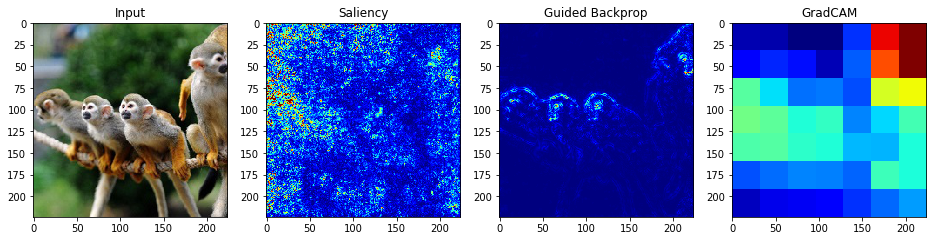

In [6]:
from attribution_bottleneck.utils.misc import show_img
import matplotlib.pyplot as plt

demo_images = {
    "Input":np.asarray(ex_image),
    **heatmaps
}

rows = len(demo_images)//4 + 1
plt.figure(figsize=(16,rows*5))
for i, (name, image) in enumerate(demo_images.items()):
    plt.subplot(rows, 4, i+1)
    plt.imshow(image, cmap="jet")
    plt.title(name)